In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [2]:
df = pd.read_csv ("C:\\Top Mentor\\House Price.csv")
df

,Id,LotFrontage,LotArea,Alley,MasVnrArea,1stFlrSF,2ndFlrSF,GrLivArea,GarageType,GarageArea,SalePrice
0,1,65.0,8450,NaN,196.0,856,854,1710,Attchd,548,208500
1,2,80.0,9600,NaN,0.0,1262,0,1262,Attchd,460,181500
2,3,68.0,11250,NaN,162.0,920,866,1786,Attchd,608,223500
3,4,60.0,9550,NaN,0.0,961,756,1717,Detchd,642,140000
4,5,84.0,14260,NaN,350.0,1145,1053,2198,Attchd,836,250000
...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,62.0,7917,NaN,0.0,953,694,1647,Attchd,460,175000
1456,1457,85.0,13175,NaN,119.0,2073,0,2073,Attchd,500,210000
1457,1458,66.0,9042,NaN,0.0,1188,1152,2340,Attchd,252,266500
1458,1459,68.0,9717,NaN,0.0,1078,0,1078,Attchd,240,142125


In [4]:
DV = input ('Enter the Dependent Variable: ')
position_dv = df.columns.get_loc (DV)
position_dv

Enter the Dependent Variable: SalePrice


10

In [5]:
print (len (df))

1460


In [6]:
df.count()

Id             1460
LotFrontage    1201
LotArea        1460
Alley            91
MasVnrArea     1452
1stFlrSF       1460
2ndFlrSF       1460
GrLivArea      1460
GarageType     1379
GarageArea     1460
SalePrice      1460
dtype: int64

In [7]:
df.size

16060

In [8]:
df.isna().sum()

Id                0
LotFrontage     259
LotArea           0
Alley          1369
MasVnrArea        8
1stFlrSF          0
2ndFlrSF          0
GrLivArea         0
GarageType       81
GarageArea        0
SalePrice         0
dtype: int64

In [9]:
df.columns

Index(['Id', 'LotFrontage', 'LotArea', 'Alley', 'MasVnrArea', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'GarageType', 'GarageArea', 'SalePrice'],
      dtype='object')

In [10]:
#creating the loop for getting all above counts in one cell

filename = pd.DataFrame( columns= ["colname", 'misingcount', 'missingpercent', "uniquevalues"])

for col in list (df.columns.values):
    sum_missing = df[col].isnull().sum()
    perc_missing = (sum_missing/ len(df)) * 100
    uniq_values = (df.groupby ([col])[col].count()) .count()
    filename = filename.append ({"colname": col, "misingcount": sum_missing, "missingpercent": perc_missing,
                                "uniquevalues": uniq_values}, ignore_index = True)
print (filename)

        colname misingcount  missingpercent uniquevalues
0            Id           0        0.000000         1460
1   LotFrontage         259       17.739726          110
2       LotArea           0        0.000000         1073
3         Alley        1369       93.767123            2
4    MasVnrArea           8        0.547945          327
5      1stFlrSF           0        0.000000          753
6      2ndFlrSF           0        0.000000          417
7     GrLivArea           0        0.000000          861
8    GarageType          81        5.547945            6
9    GarageArea           0        0.000000          441
10    SalePrice           0        0.000000          663


In [11]:
FileDType = (df.dtypes).reset_index()
FileDType

,index,0
0,Id,int64
1,LotFrontage,float64
2,LotArea,int64
3,Alley,object
4,MasVnrArea,float64
5,1stFlrSF,int64
6,2ndFlrSF,int64
7,GrLivArea,int64
8,GarageType,object
9,GarageArea,int64


In [12]:
filename = filename.merge (FileDType, left_on = "colname", right_on = "index", how = "inner")
filename

,colname,misingcount,missingpercent,uniquevalues,index,0
0,Id,0,0.000000,1460,Id,int64
1,LotFrontage,259,17.739726,110,LotFrontage,float64
2,LotArea,0,0.000000,1073,LotArea,int64
3,Alley,1369,93.767123,2,Alley,object
4,MasVnrArea,8,0.547945,327,MasVnrArea,float64
5,1stFlrSF,0,0.000000,753,1stFlrSF,int64
6,2ndFlrSF,0,0.000000,417,2ndFlrSF,int64
7,GrLivArea,0,0.000000,861,GrLivArea,int64
8,GarageType,81,5.547945,6,GarageType,object
9,GarageArea,0,0.000000,441,GarageArea,int64


In [13]:
del filename['index']

In [14]:
filename = filename.rename (index = str, columns = {0 : 'DataType'})
filename

,colname,misingcount,missingpercent,uniquevalues,DataType
0,Id,0,0.000000,1460,int64
1,LotFrontage,259,17.739726,110,float64
2,LotArea,0,0.000000,1073,int64
3,Alley,1369,93.767123,2,object
4,MasVnrArea,8,0.547945,327,float64
5,1stFlrSF,0,0.000000,753,int64
6,2ndFlrSF,0,0.000000,417,int64
7,GrLivArea,0,0.000000,861,int64
8,GarageType,81,5.547945,6,object
9,GarageArea,0,0.000000,441,int64


In [15]:
df.drop (["Alley"], axis = 1, inplace = True)
df

,Id,LotFrontage,LotArea,MasVnrArea,1stFlrSF,2ndFlrSF,GrLivArea,GarageType,GarageArea,SalePrice
0,1,65.0,8450,196.0,856,854,1710,Attchd,548,208500
1,2,80.0,9600,0.0,1262,0,1262,Attchd,460,181500
2,3,68.0,11250,162.0,920,866,1786,Attchd,608,223500
3,4,60.0,9550,0.0,961,756,1717,Detchd,642,140000
4,5,84.0,14260,350.0,1145,1053,2198,Attchd,836,250000
...,...,...,...,...,...,...,...,...,...,...
1455,1456,62.0,7917,0.0,953,694,1647,Attchd,460,175000
1456,1457,85.0,13175,119.0,2073,0,2073,Attchd,500,210000
1457,1458,66.0,9042,0.0,1188,1152,2340,Attchd,252,266500
1458,1459,68.0,9717,0.0,1078,0,1078,Attchd,240,142125


In [16]:
#checking if there are any outliers

def remove_outliers (df_in, col_name):
    q1 = df_in [col_name].quantile (0.25)
    q3 = df_in [col_name].quantile (0.75)
    iqr = q3 - q1
    fence_low = q1 - 1.5 * iqr
    fence_high = q3 - 1.5 * iqr
    df_out = df_in.loc [(df_in[col_name] > fence_low)]
    return df_out    

In [17]:
#Extracting the numeric columns

df_col = filename [(filename.DataType == 'int64') | (filename.DataType == 'float64')]
df_col

,colname,misingcount,missingpercent,uniquevalues,DataType
0,Id,0,0.000000,1460,int64
1,LotFrontage,259,17.739726,110,float64
2,LotArea,0,0.000000,1073,int64
4,MasVnrArea,8,0.547945,327,float64
5,1stFlrSF,0,0.000000,753,int64
6,2ndFlrSF,0,0.000000,417,int64
7,GrLivArea,0,0.000000,861,int64
9,GarageArea,0,0.000000,441,int64
10,SalePrice,0,0.000000,663,int64


In [18]:
for col_na in df_col ["colname"]:
    if col_na != DV:
        df = remove_outliers (df, col_na)

In [19]:
df

,Id,LotFrontage,LotArea,MasVnrArea,1stFlrSF,2ndFlrSF,GrLivArea,GarageType,GarageArea,SalePrice
0,1,65.0,8450,196.0,856,854,1710,Attchd,548,208500
1,2,80.0,9600,0.0,1262,0,1262,Attchd,460,181500
2,3,68.0,11250,162.0,920,866,1786,Attchd,608,223500
3,4,60.0,9550,0.0,961,756,1717,Detchd,642,140000
4,5,84.0,14260,350.0,1145,1053,2198,Attchd,836,250000
...,...,...,...,...,...,...,...,...,...,...
1455,1456,62.0,7917,0.0,953,694,1647,Attchd,460,175000
1456,1457,85.0,13175,119.0,2073,0,2073,Attchd,500,210000
1457,1458,66.0,9042,0.0,1188,1152,2340,Attchd,252,266500
1458,1459,68.0,9717,0.0,1078,0,1078,Attchd,240,142125


In [20]:
df.count ()

Id             1152
LotFrontage    1152
LotArea        1152
MasVnrArea     1152
1stFlrSF       1152
2ndFlrSF       1152
GrLivArea      1152
GarageType     1084
GarageArea     1152
SalePrice      1152
dtype: int64

In [21]:
df.isna().sum()

Id              0
LotFrontage     0
LotArea         0
MasVnrArea      0
1stFlrSF        0
2ndFlrSF        0
GrLivArea       0
GarageType     68
GarageArea      0
SalePrice       0
dtype: int64

In [22]:
# We are trying to do a groupby

df.groupby ('GarageType').agg ({'GarageType': np.size})

,GarageType
GarageType,
2Types,5
Attchd,675
Basment,15
BuiltIn,63
CarPort,8
Detchd,318


In [23]:
# Filling the null values with mode
df['GarageType'] = df['GarageType'].fillna ('Attchd')

In [24]:
df.groupby ('GarageType').agg ({'GarageType': np.size})

,GarageType
GarageType,
2Types,5
Attchd,743
Basment,15
BuiltIn,63
CarPort,8
Detchd,318


In [25]:
df

,Id,LotFrontage,LotArea,MasVnrArea,1stFlrSF,2ndFlrSF,GrLivArea,GarageType,GarageArea,SalePrice
0,1,65.0,8450,196.0,856,854,1710,Attchd,548,208500
1,2,80.0,9600,0.0,1262,0,1262,Attchd,460,181500
2,3,68.0,11250,162.0,920,866,1786,Attchd,608,223500
3,4,60.0,9550,0.0,961,756,1717,Detchd,642,140000
4,5,84.0,14260,350.0,1145,1053,2198,Attchd,836,250000
...,...,...,...,...,...,...,...,...,...,...
1455,1456,62.0,7917,0.0,953,694,1647,Attchd,460,175000
1456,1457,85.0,13175,119.0,2073,0,2073,Attchd,500,210000
1457,1458,66.0,9042,0.0,1188,1152,2340,Attchd,252,266500
1458,1459,68.0,9717,0.0,1078,0,1078,Attchd,240,142125


In [26]:
df.describe()

,Id,LotFrontage,LotArea,MasVnrArea,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,SalePrice
count,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000
mean,725.289931,71.797743,10250.949653,100.685764,1175.635417,339.500868,1521.969618,477.657986,182751.646701
std,422.322274,22.909899,7934.511000,185.475401,380.548830,439.494220,533.618214,221.454659,83619.813688
min,1.000000,30.000000,2448.000000,0.000000,334.000000,0.000000,334.000000,0.000000,34900.000000
25%,359.750000,60.000000,7741.500000,0.000000,894.000000,0.000000,1137.750000,319.750000,129000.000000
50%,719.500000,70.000000,9410.500000,0.000000,1096.500000,0.000000,1470.500000,480.500000,160600.000000
75%,1094.250000,80.000000,11341.000000,153.250000,1408.000000,728.000000,1776.750000,589.000000,215000.000000
max,1460.000000,313.000000,215245.000000,1600.000000,4692.000000,2065.000000,5642.000000,1418.000000,755000.000000


In [27]:
df.dtypes

Id               int64
LotFrontage    float64
LotArea          int64
MasVnrArea     float64
1stFlrSF         int64
2ndFlrSF         int64
GrLivArea        int64
GarageType      object
GarageArea       int64
SalePrice        int64
dtype: object

In [28]:
# changing the datatype of "GarageType" (object) to the category

df["GarageType"] = df["GarageType"].astype ('category')

In [29]:
#changed theb datatype to category
# because we cannot use labelencoding on object column
df.dtypes

Id                int64
LotFrontage     float64
LotArea           int64
MasVnrArea      float64
1stFlrSF          int64
2ndFlrSF          int64
GrLivArea         int64
GarageType     category
GarageArea        int64
SalePrice         int64
dtype: object

In [30]:
# label encoding the "GarageType" column

df["GarageType"] = df ["GarageType"].cat.codes

In [31]:
# label changed to the numbers

df.groupby ('GarageType').agg ({'GarageType': np.size})

,GarageType
GarageType,
0,5
1,743
2,15
3,63
4,8
5,318


In [32]:
# one hot encoding to the "GarageType" column

df = pd.get_dummies (df, columns = ["GarageType"], drop_first = True)

In [33]:
# filling the missing values to "MasVnrArea" 

df["MasVnrArea"]. fillna(df["MasVnrArea"].median(), inplace = True)

In [34]:
df

,Id,LotFrontage,LotArea,MasVnrArea,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,SalePrice,GarageType_1,GarageType_2,GarageType_3,GarageType_4,GarageType_5
0,1,65.0,8450,196.0,856,854,1710,548,208500,1,0,0,0,0
1,2,80.0,9600,0.0,1262,0,1262,460,181500,1,0,0,0,0
2,3,68.0,11250,162.0,920,866,1786,608,223500,1,0,0,0,0
3,4,60.0,9550,0.0,961,756,1717,642,140000,0,0,0,0,1
4,5,84.0,14260,350.0,1145,1053,2198,836,250000,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,62.0,7917,0.0,953,694,1647,460,175000,1,0,0,0,0
1456,1457,85.0,13175,119.0,2073,0,2073,500,210000,1,0,0,0,0
1457,1458,66.0,9042,0.0,1188,1152,2340,252,266500,1,0,0,0,0
1458,1459,68.0,9717,0.0,1078,0,1078,240,142125,1,0,0,0,0


In [35]:
dx = df["SalePrice"]
dx

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1152, dtype: int64

In [36]:
df.drop (["SalePrice"], axis =1, inplace =True)

In [37]:
df

,Id,LotFrontage,LotArea,MasVnrArea,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,GarageType_1,GarageType_2,GarageType_3,GarageType_4,GarageType_5
0,1,65.0,8450,196.0,856,854,1710,548,1,0,0,0,0
1,2,80.0,9600,0.0,1262,0,1262,460,1,0,0,0,0
2,3,68.0,11250,162.0,920,866,1786,608,1,0,0,0,0
3,4,60.0,9550,0.0,961,756,1717,642,0,0,0,0,1
4,5,84.0,14260,350.0,1145,1053,2198,836,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,62.0,7917,0.0,953,694,1647,460,1,0,0,0,0
1456,1457,85.0,13175,119.0,2073,0,2073,500,1,0,0,0,0
1457,1458,66.0,9042,0.0,1188,1152,2340,252,1,0,0,0,0
1458,1459,68.0,9717,0.0,1078,0,1078,240,1,0,0,0,0


In [38]:
df = pd.concat ([df,dx], axis = 1)
display (df)

,Id,LotFrontage,LotArea,MasVnrArea,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,GarageType_1,GarageType_2,GarageType_3,GarageType_4,GarageType_5,SalePrice
0,1,65.0,8450,196.0,856,854,1710,548,1,0,0,0,0,208500
1,2,80.0,9600,0.0,1262,0,1262,460,1,0,0,0,0,181500
2,3,68.0,11250,162.0,920,866,1786,608,1,0,0,0,0,223500
3,4,60.0,9550,0.0,961,756,1717,642,0,0,0,0,1,140000
4,5,84.0,14260,350.0,1145,1053,2198,836,1,0,0,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,62.0,7917,0.0,953,694,1647,460,1,0,0,0,0,175000
1456,1457,85.0,13175,119.0,2073,0,2073,500,1,0,0,0,0,210000
1457,1458,66.0,9042,0.0,1188,1152,2340,252,1,0,0,0,0,266500
1458,1459,68.0,9717,0.0,1078,0,1078,240,1,0,0,0,0,142125


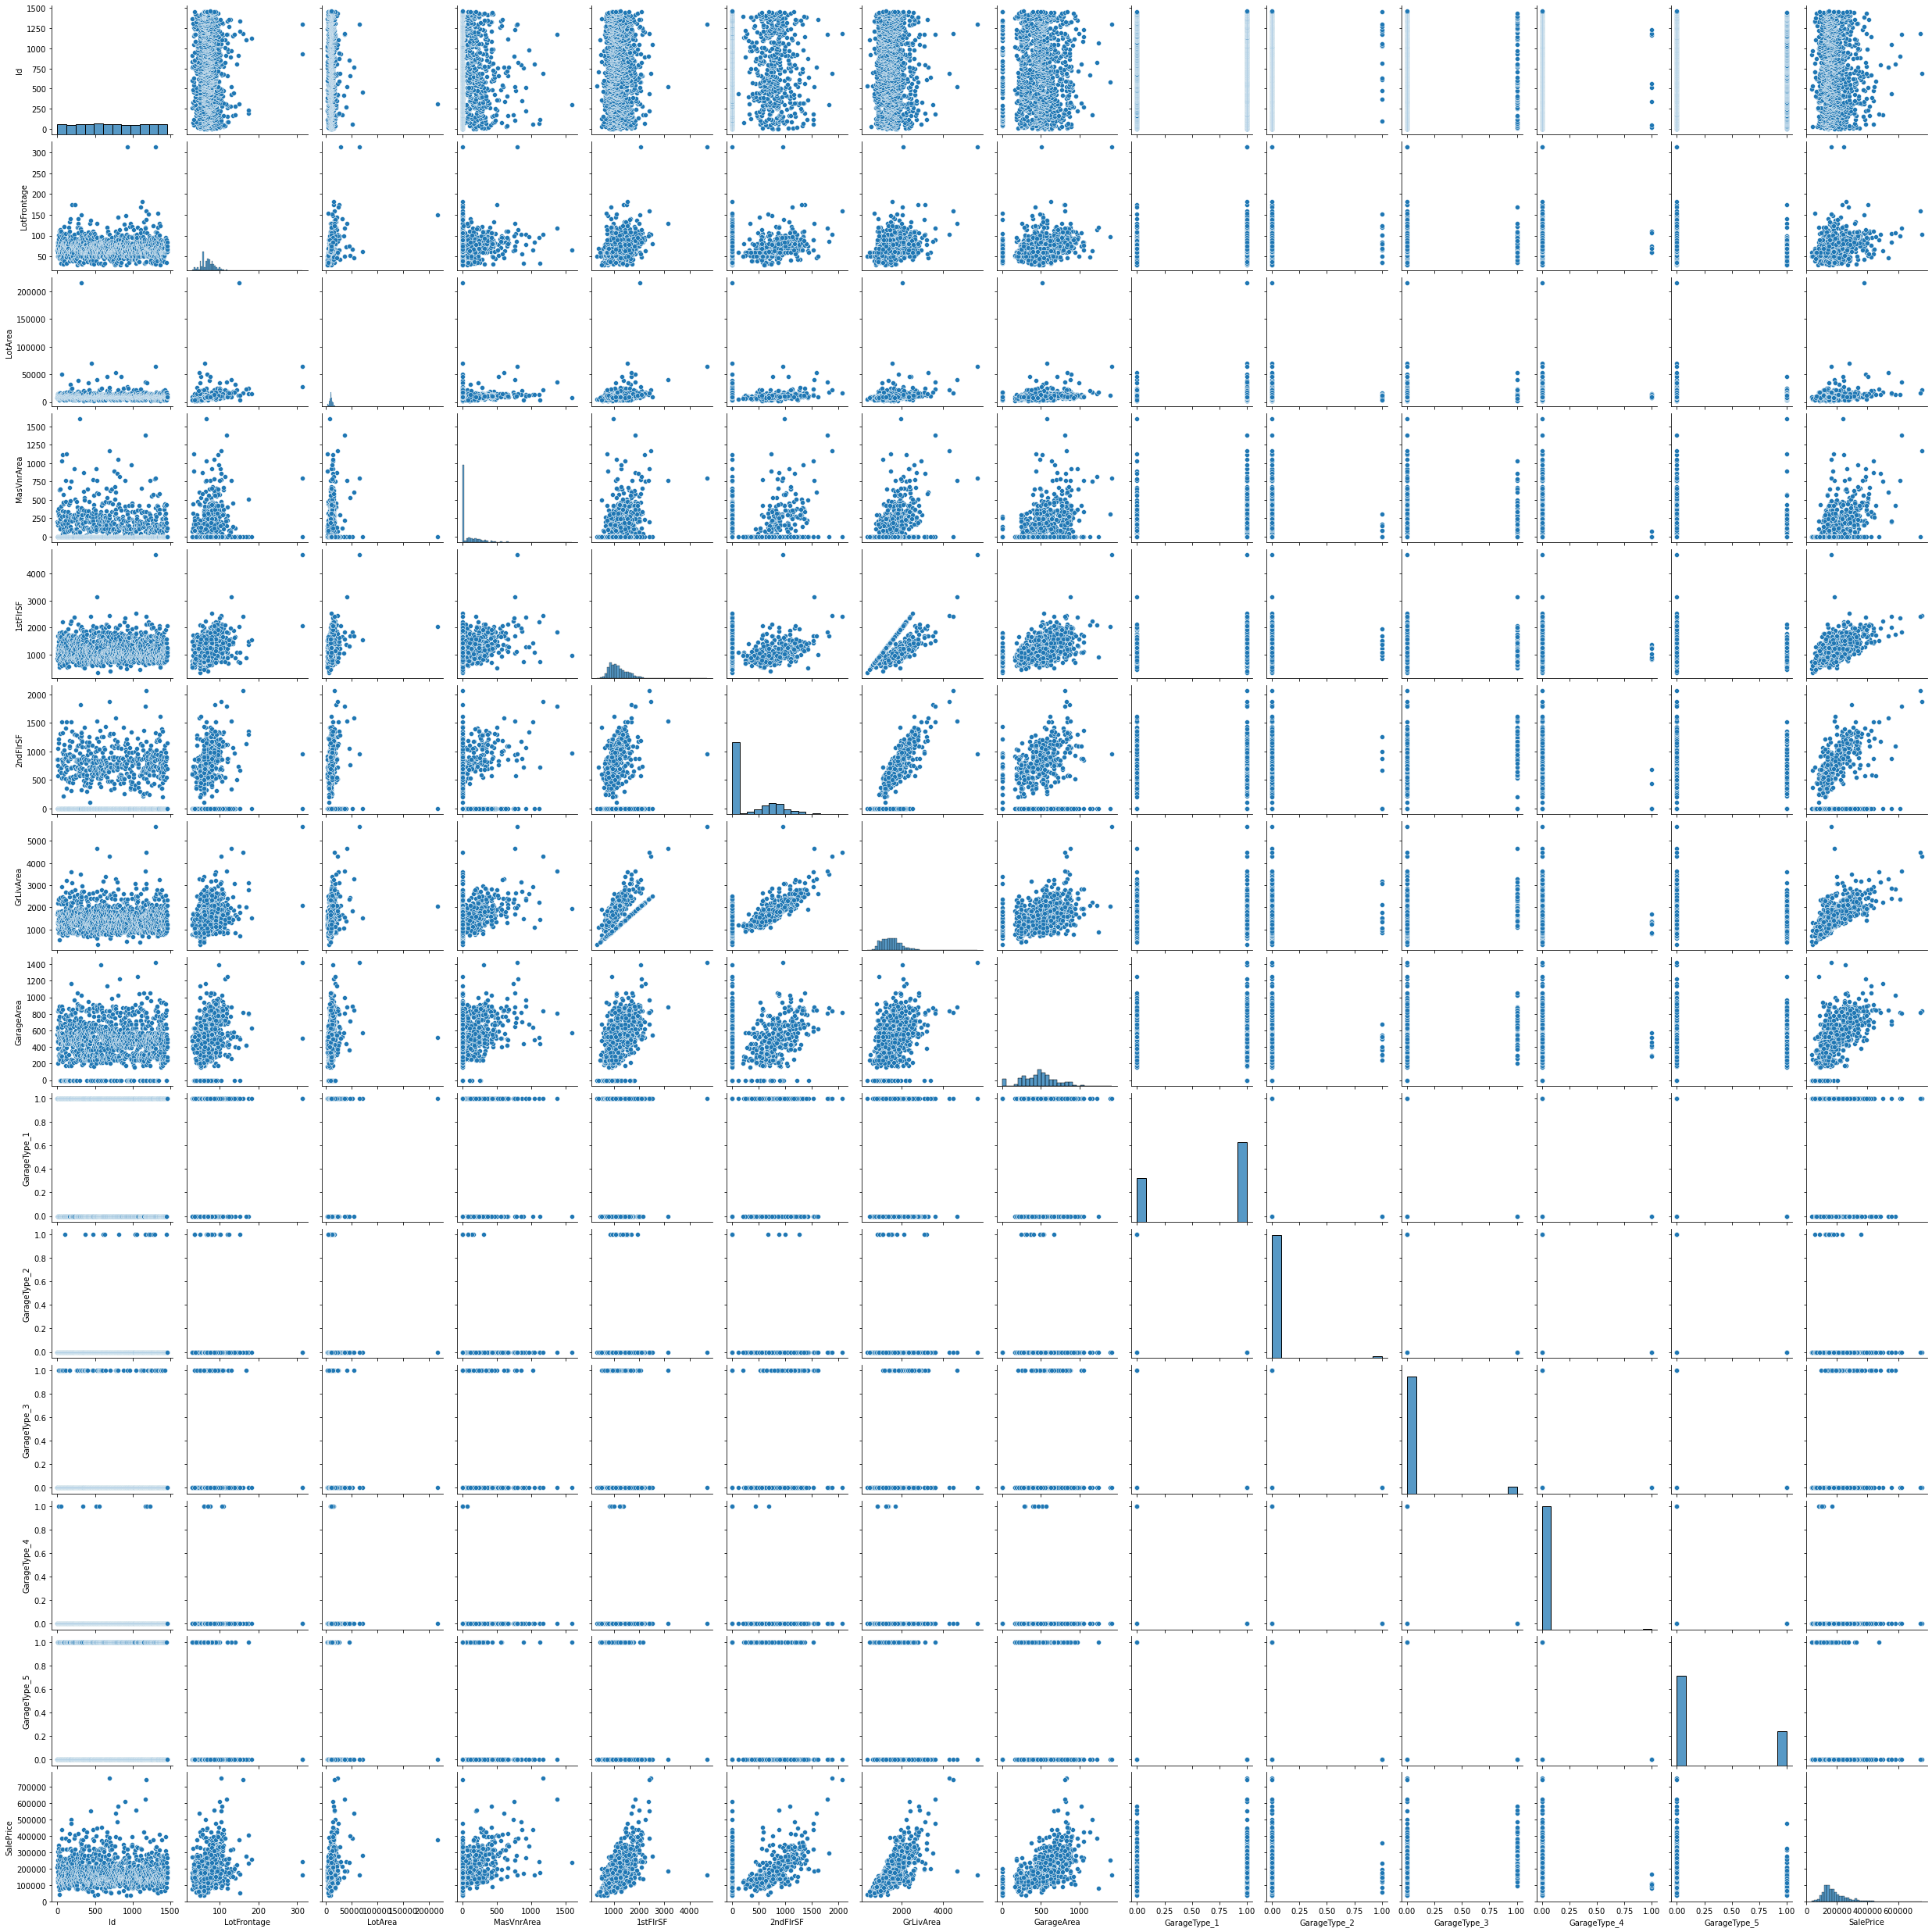

In [39]:
# We want to check the relationship between the columns

import seaborn as sns
sns.pairplot (df)

<AxesSubplot:>

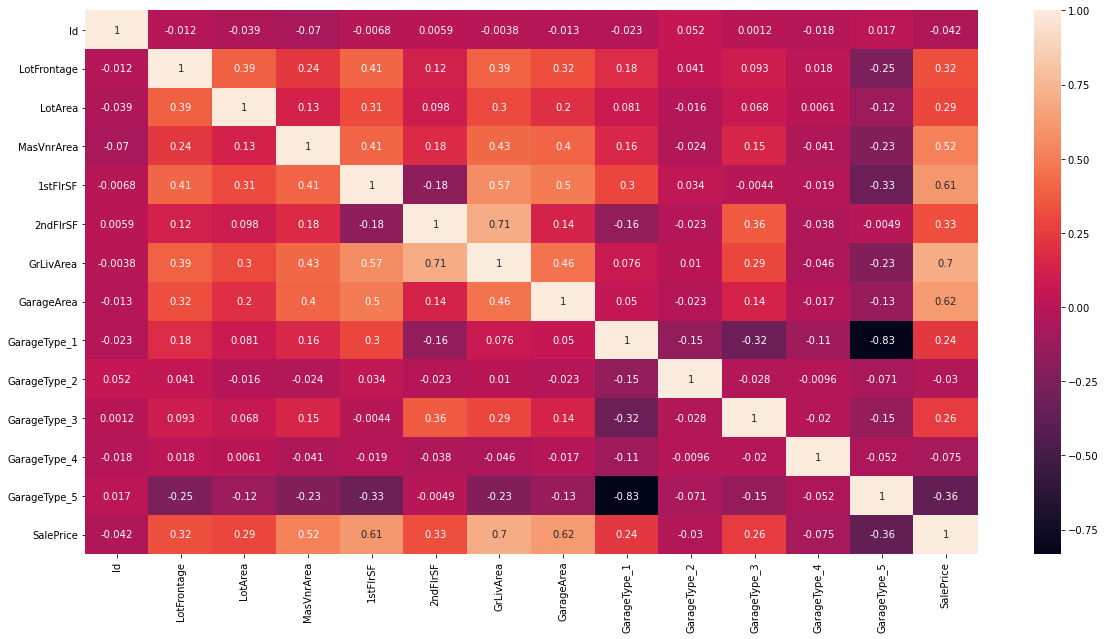

In [40]:
from matplotlib.pyplot import rcParams
rcParams ['figure.figsize'] = 20, 10
df.corr ()
sns.heatmap (df.corr(), annot = True)

In [41]:
# Spliting the data between X and Y

x = df.iloc [:,1:13]
x


,LotFrontage,LotArea,MasVnrArea,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,GarageType_1,GarageType_2,GarageType_3,GarageType_4,GarageType_5
0,65.0,8450,196.0,856,854,1710,548,1,0,0,0,0
1,80.0,9600,0.0,1262,0,1262,460,1,0,0,0,0
2,68.0,11250,162.0,920,866,1786,608,1,0,0,0,0
3,60.0,9550,0.0,961,756,1717,642,0,0,0,0,1
4,84.0,14260,350.0,1145,1053,2198,836,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,0.0,953,694,1647,460,1,0,0,0,0
1456,85.0,13175,119.0,2073,0,2073,500,1,0,0,0,0
1457,66.0,9042,0.0,1188,1152,2340,252,1,0,0,0,0
1458,68.0,9717,0.0,1078,0,1078,240,1,0,0,0,0


In [42]:
y = df.iloc [:, 13:]
y

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


In [43]:
# Train test split

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size = 0.2, random_state = 42)


In [44]:
# Creating the model

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm = lm.fit(x_train,y_train)   

In [45]:
# Displaying the coefficients

coefficients = pd.concat([pd.DataFrame(x_train.columns),pd.DataFrame(np.transpose(lm.coef_))], axis = 1)
print (coefficients)

               0              0
0    LotFrontage    -344.578034
1        LotArea       0.548701
2     MasVnrArea      64.739240
3       1stFlrSF      74.708998
4       2ndFlrSF      40.752700
5      GrLivArea      18.185313
6     GarageArea     114.976595
7   GarageType_1  101232.291496
8   GarageType_2   71832.187916
9   GarageType_3  118498.556424
10  GarageType_4   50257.217365
11  GarageType_5   69197.949784


In [46]:
lm.intercept_

array([-80745.17050416])

In [47]:
# Predicting the test data

y_pred = lm.predict(x_test)
y_pred

array([[217030.62443883],
       [157557.90472424],
       [230028.50304127],
       [142109.91400665],
       [189413.59747493],
       [105016.66765076],
       [208735.68976056],
       [167400.83929922],
       [146677.01365265],
       [110959.69444207],
       [161611.32886151],
       [245592.1235652 ],
       [166227.93359508],
       [ 83513.52120349],
       [151251.88072827],
       [169506.36173591],
       [274117.93855162],
       [259427.5764548 ],
       [191879.12149349],
       [222267.6580276 ],
       [194448.24402913],
       [222864.45659398],
       [179829.32986502],
       [190846.93056933],
       [163843.72973768],
       [252819.68804105],
       [209725.48152191],
       [178183.55022175],
       [254419.07654937],
       [146362.38741901],
       [202850.26778726],
       [ 84658.06701931],
       [124543.28911274],
       [228998.58768731],
       [219147.03640002],
       [ 95673.17644481],
       [209213.88333235],
       [107899.04741388],
       [2160

In [48]:
y_test

,SalePrice
220,204900
945,124900
730,236500
299,158500
891,172500
...,...
450,110000
77,127000
486,156000
1353,410000


In [49]:
# Checking the accuracy

from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7438360429385222

In [50]:
# Try and apply cross validation

from sklearn.model_selection import cross_val_score
cvm= cross_val_score(lm, x, y, cv=5)
pd.DataFrame(cvm)

,0
0,0.758982
1,0.676576
2,0.742939
3,0.669988
4,0.480129


In [51]:

print ('Mean', cvm.mean())
print ('STD',cvm.std())

Mean 0.6657227484815309
STD 0.09923760235391314


In [52]:
## let's add an intercept (beta_0) to our model

import statsmodels.api as sma
x_train = sma.add_constant(x_train) 
x_test = sma.add_constant(x_test)

In [53]:
# Applying OLS method 

import statsmodels.api as sm
lm2 = sm.OLS(y_train,x_train).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     159.5
Date:                Sat, 09 Jul 2022   Prob (F-statistic):          5.88e-214
Time:                        23:07:50   Log-Likelihood:                -11229.
No. Observations:                 921   AIC:                         2.248e+04
Df Residuals:                     908   BIC:                         2.255e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -8.075e+04   2.29e+04     -3.518      0.000   -1.26e+05   -3.57e+04
LotFrontage   -344.5780     80.552     -4.278      0.000    -502.668    -186.488
LotArea          0.5487      0.206      2.660      0.008       0.144       0.953
MasVnrArea      64.7392     10.665      6.070      0.000      43.809      85.670
1stFlrSF        74.7090     30.367      2.460      0.014      15.111     134.307
2ndFlrSF        40.7527     30.079      1.355      0.176     -18.279      99.785
GrLivArea       18.1853     29.204      0.623      0.534     -39.129      75.500
GarageArea     114.9766      8.898     12.922      0.000      97.514     132.440
GarageType_1  1.012e+05   2.18e+04      4.634      0.000    5.84e+04    1.44e+05
GarageType_2  7.183e+04   2.53e+04      2.834      0.005    2.21e+04    1.22e+05
GarageType_3  1.185e+05   2.29e+04      5.184      0.000    7.36e+04    1.63e+05
GarageType_4  5.026e+04   2.93e+04      1.716      0.087   -7232.739    1.08e+05
GarageType_5   6.92e+04   2.19e+04      3.154      0.002    2.61e+04    1.12e+05
==============================================================================
Omnibus:                      280.203   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17024.303
Skew:                          -0.488   Prob(JB):                         0.00
Kurtosis:                      24.040   Cond. No.                     4.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
# we can eleminate the columns having the p_value greater then 0.05 using a function, loop or simply we can drop the columns

df = df.drop (['GrLivArea','GarageType_4'], axis = 1)
df

,Id,LotFrontage,LotArea,MasVnrArea,1stFlrSF,2ndFlrSF,GarageArea,GarageType_1,GarageType_2,GarageType_3,GarageType_5,SalePrice
0,1,65.0,8450,196.0,856,854,548,1,0,0,0,208500
1,2,80.0,9600,0.0,1262,0,460,1,0,0,0,181500
2,3,68.0,11250,162.0,920,866,608,1,0,0,0,223500
3,4,60.0,9550,0.0,961,756,642,0,0,0,1,140000
4,5,84.0,14260,350.0,1145,1053,836,1,0,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,62.0,7917,0.0,953,694,460,1,0,0,0,175000
1456,1457,85.0,13175,119.0,2073,0,500,1,0,0,0,210000
1457,1458,66.0,9042,0.0,1188,1152,252,1,0,0,0,266500
1458,1459,68.0,9717,0.0,1078,0,240,1,0,0,0,142125


In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
[{x_train.columns[j]:variance_inflation_factor(x_train.values, j) for j in range(x_train.shape[1])}]

[{'const': 209.81189981695437,
  'LotFrontage': 1.4081705306986527,
  'LotArea': 1.2269884891834866,
  'MasVnrArea': 1.4349064013140143,
  '1stFlrSF': 53.16595076818583,
  '2ndFlrSF': 68.13005535895603,
  'GrLivArea': 98.15383150715138,
  'GarageArea': 1.585196732243426,
  'GarageType_1': 43.947662267652035,
  'GarageType_2': 3.830509375926016,
  'GarageType_3': 10.889840206944601,
  'GarageType_4': 2.2123788457371556,
  'GarageType_5': 38.66909075586195}]

In [56]:
# Eliminating the columns having VIF value > 5 with help of function 

def calculate_vif(x):
    thresh = 5.0
    output = pd.DataFrame()
    k = x.shape[1]
    vif = [variance_inflation_factor(x.values, j) for j in range(x.shape[1])]
    for i in range(1,k):
        print("Iteration no: ", i)
        print(vif, '\n')
        a = np.argmax(vif)
        print("Max VIF is for variable no:",a)
        print("Column Name:",x.columns[a], '\n')
      
        if vif[a] <= thresh :
            break
        if i == 1 :          
            x= x.drop(x.columns[a], axis = 1)
            vif = [variance_inflation_factor(x.values, j) for j in range(x.shape[1])]
        elif i > 1 :
            x = x.drop(x.columns[a],axis = 1)
            vif = [variance_inflation_factor(x.values, j) for j in range(x.shape[1])]
    return(x)

In [57]:
train_out = calculate_vif(x_train)

Iteration no:  1
[209.81189981695437, 1.4081705306986527, 1.2269884891834866, 1.4349064013140143, 53.16595076818583, 68.13005535895603, 98.15383150715138, 1.585196732243426, 43.947662267652035, 3.830509375926016, 10.889840206944601, 2.2123788457371556, 38.66909075586195] 

Max VIF is for variable no: 0
Column Name: const 

Iteration no:  2
[14.424689134126245, 2.979238864271323, 1.8360689054934816, 553.5010083432483, 108.29202555460274, 872.0148088363268, 8.4799794970939, 11.981685759812978, 1.2932420572214882, 2.2395336278526927, 1.10648876739846, 4.47975368118292] 

Max VIF is for variable no: 5
Column Name: GrLivArea 

Iteration no:  3
[14.411974453870753, 2.9788139789368193, 1.828923534160743, 20.087242140101296, 2.0764552096902116, 8.327905006851887, 11.96440579796157, 1.2925968439701139, 2.232169720276637, 1.1062232692768836, 4.479592843409302] 

Max VIF is for variable no: 3
Column Name: 1stFlrSF 

Iteration no:  4
[13.556067556826177, 2.862666796089266, 1.6930828856720395, 1.87

In [58]:
x_train.shape

(921, 13)

In [59]:
train_out.head()


,LotArea,MasVnrArea,2ndFlrSF,GarageType_1,GarageType_2,GarageType_3,GarageType_4,GarageType_5
122,9464,135.0,0,1,0,0,0,0
212,8640,0.0,920,1,0,0,0,0
1415,3635,130.0,0,1,0,0,0,0
942,7711,0.0,0,1,0,0,0,0
525,7500,0.0,0,1,0,0,0,0


In [60]:
# Creating the model again after removing the insignificant columns

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm = lm.fit(train_out,y_train)   

In [61]:
import statsmodels.api as sm
lm2 = sm.OLS(y_train,train_out).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.899
Model:                            OLS   Adj. R-squared (uncentered):              0.898
Method:                 Least Squares   F-statistic:                              1019.
Date:                Sat, 09 Jul 2022   Prob (F-statistic):                        0.00
Time:                        23:07:50   Log-Likelihood:                         -11491.
No. Observations:                 921   AIC:                                  2.300e+04
Df Residuals:                     913   BIC:                                  2.304e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
LotArea          1.8036      0.249      7.255      0.000       1.316       2.291
MasVnrArea     196.8667     12.354     15.936      0.000     172.622     221.111
2ndFlrSF        41.7081      5.231      7.973      0.000      31.441      51.975
GarageType_1  1.421e+05   4080.160     34.815      0.000    1.34e+05     1.5e+05
GarageType_2  1.177e+05   1.72e+04      6.844      0.000     8.4e+04    1.52e+05
GarageType_3  1.618e+05   1.08e+04     15.043      0.000    1.41e+05    1.83e+05
GarageType_4  8.827e+04   2.62e+04      3.374      0.001    3.69e+04     1.4e+05
GarageType_5  9.777e+04   4753.752     20.567      0.000    8.84e+04    1.07e+05
==============================================================================
Omnibus:                      313.241   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2393.073
Skew:                           1.340   Prob(JB):                         0.00
Kurtosis:                      10.428   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""